In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

In [4]:
auto_prices = pd.read_csv(r'/home/krishna/Documents/Machine Learning Basics/vehicles.csv')

In [5]:
print(auto_prices.shape)
print(auto_prices.columns)

(435849, 25)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


In [7]:
auto_prices.nunique(axis=0)

id              137772
url             137772
region             402
region_url         413
price            12672
year                25
manufacturer        40
model            17200
condition            6
cylinders            8
fuel                 5
odometer         87261
title_status         6
transmission         3
vin             137771
drive                3
size                 4
type                13
paint_color         12
image_url       134748
description     136854
county               0
state               51
lat              15889
long             15373
dtype: int64

In [11]:
auto_prices.dtypes

id                int64
url              object
region           object
region_url       object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [ ]:

Due to the way that the listings were presented CraigsList, certain sponsored listings appeared on nearly every page. This can be removed by limiting the dataset to only contain unique VIN's (vehicle identification number).

For the same reason that there were duplicate vins, there are some listings returned that are outside of my year range (2005-2016). Remove the entries outside that range

In [6]:
print ('rows before removing duplicates:', auto_prices.shape[0])
auto_prices.drop_duplicates('vin',inplace=True)
print ('rows after removing duplicates:', auto_prices.shape[0])

# limit years
print ('\nrows before filtering years:', auto_prices.shape[0])
auto_prices = auto_prices[(auto_prices.year >= 1995) & (auto_prices.year <= 2019)]
print( 'rows after  filtering years:', auto_prices.shape[0])

rows before removing duplicates: 435849
rows after removing duplicates: 141547

rows before filtering years: 141547
rows after  filtering years: 137772


In [8]:
auto_prices.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      3447
model              754
condition        60559
cylinders        53509
fuel              1527
odometer          3782
title_status       942
transmission      1287
vin                  1
drive            27183
size             96054
type             19649
paint_color      31874
image_url            0
description          0
county          137772
state                0
lat               1645
long              1645
dtype: int64

In [15]:
ap_prices.head()

id         region  price    year manufacturer                model  \
0  7119256118  mohave county   3495  2012.0         jeep              patriot   
3  7119250502  mohave county   9000  2004.0    chevrolet          colorado ls   
6  7120431378          maine      0  2014.0         ford                f-150   
7  7120430837          maine   8500  2005.0         ford  mustang convertible   
8  7120857037   oregon coast      0  2012.0          ram                 3500   

   condition    cylinders    fuel  odometer title_status transmission drive  \
0   like new  4 cylinders     gas       NaN        clean    automatic   NaN   
3  excellent  5 cylinders     gas   54000.0        clean    automatic   rwd   
6  excellent  8 cylinders     gas       0.0        clean    automatic   4wd   
7  excellent  6 cylinders     gas   62800.0        clean    automatic   rwd   
8        NaN  6 cylinders  diesel  116515.0        clean    automatic   4wd   

        size         type paint_color state  
0        NaN          NaN      silver    az  
3   mid-size       pickup         red    az  
6  full-size       pickup         NaN    me  
7   mid-size  convertible      silver    me  
8        NaN        truck         NaN    or

In [14]:
cols=['id','region','price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state']
ap_prices=auto_prices[cols]

In [16]:
imputer=KNNImputer(n_neighbors=4,weights="uniform")
ap_prices=imputer.fit_transform(ap_prices)

ValueError: could not convert string to float: 'mohave county'

In [ ]:

print ("%s rows before drops" % auto_prices.shape[0])
auto_prices.makeName.dropna(inplace=True)
cc_data.modelYear.dropna(inplace=True)

# model year requires a bit more work
# values of "" need to be explicitly converted to NaN before being dropped
cc_data.modelName.replace('', np.nan, inplace=True)
cc_data.dropna(subset=['modelName'], inplace=True)
print "\n%s rows after drops" % cc_data.shape[0]

In [12]:
auto_prices.describe()

id         price           year      odometer  county  \
count  4.358490e+05  4.358490e+05  434732.000000  3.607010e+05     0.0   
mean   7.115954e+09  1.349127e+05    2009.866460  9.897590e+04     NaN   
std    4.590854e+06  1.690857e+07       9.312503  1.134990e+05     NaN   
min    7.096577e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.112450e+09  4.900000e+03    2007.000000  4.733300e+04     NaN   
50%    7.117092e+09  9.995000e+03    2012.000000  9.118800e+04     NaN   
75%    7.120090e+09  1.798900e+04    2015.000000  1.347360e+05     NaN   
max    7.121608e+09  3.647257e+09    2021.000000  1.000000e+07     NaN   

                 lat           long  
count  427614.000000  427614.000000  
mean       38.404163     -94.961170  
std         6.036915      18.058561  
min       -83.197100    -177.012000  
25%        34.225700    -111.731000  
50%        38.934800     -89.676700  
75%        42.484500     -81.397300  
max        79.601900     173.675000

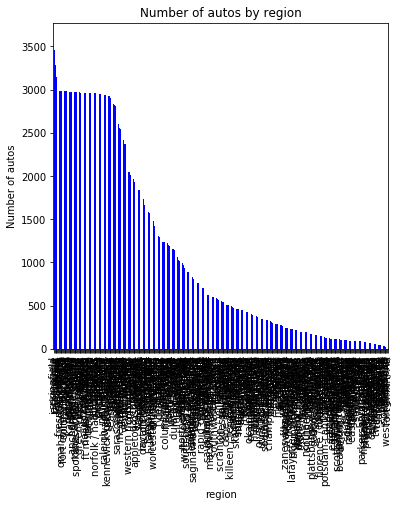

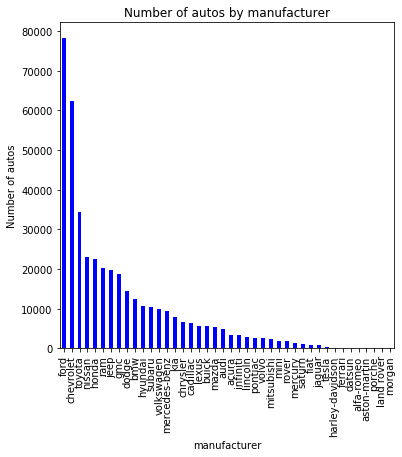

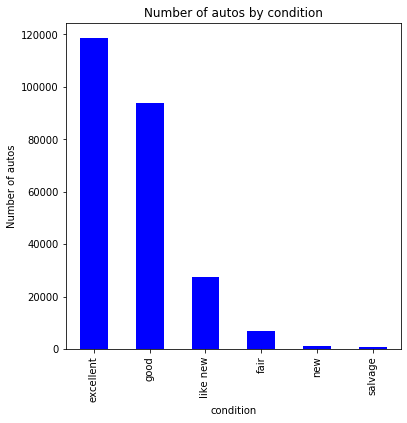

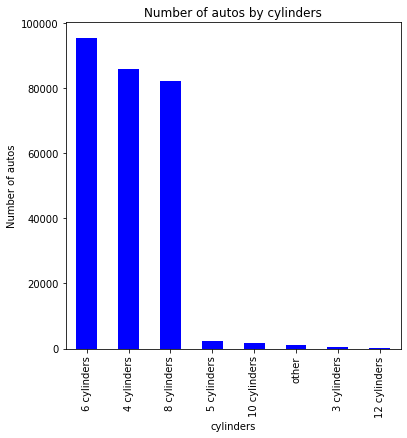

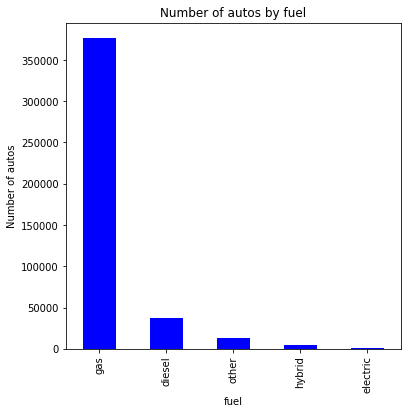

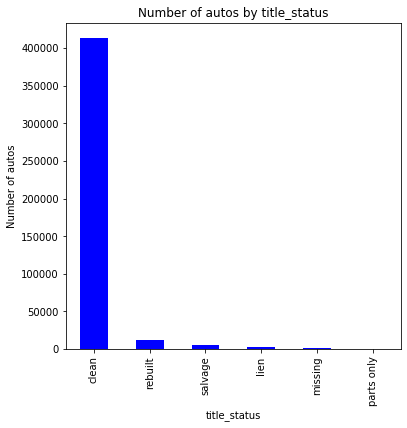

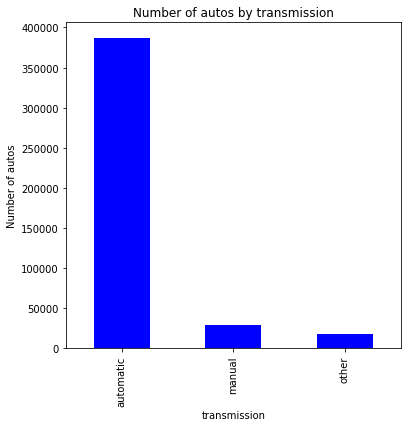

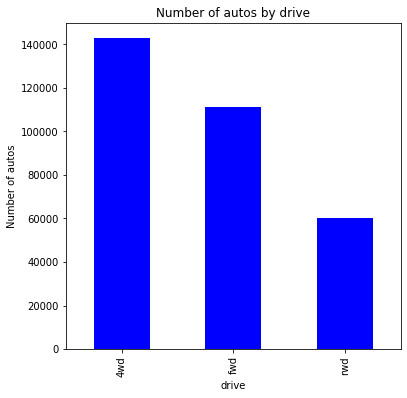

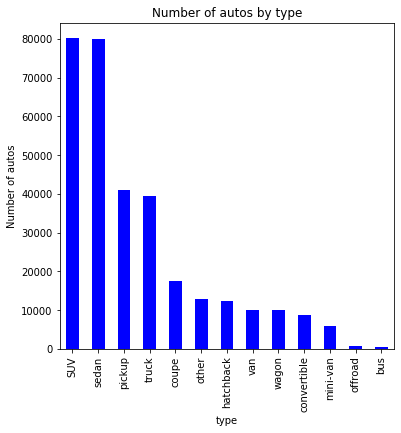

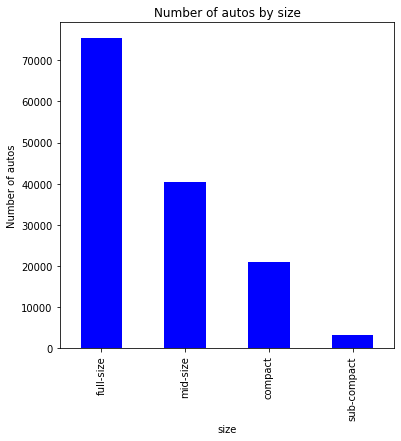

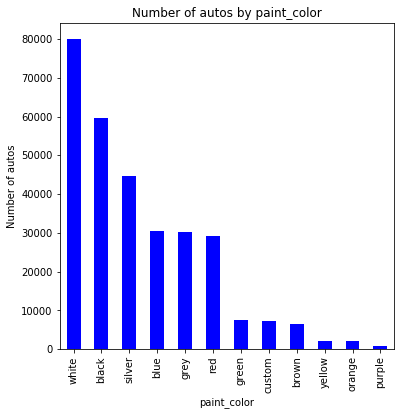

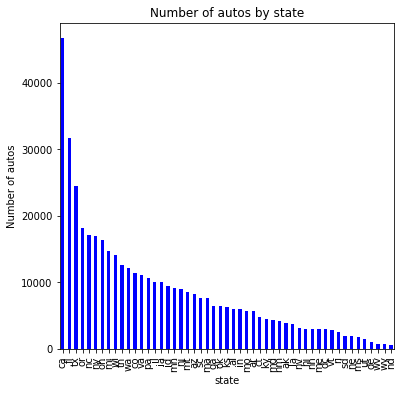

In [14]:
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = auto_prices[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

plot_cols = ['region', 'manufacturer', 'condition','cylinders','fuel','title_status','transmission','drive','type','size','paint_color','state']
plot_bars(auto_prices, plot_cols)

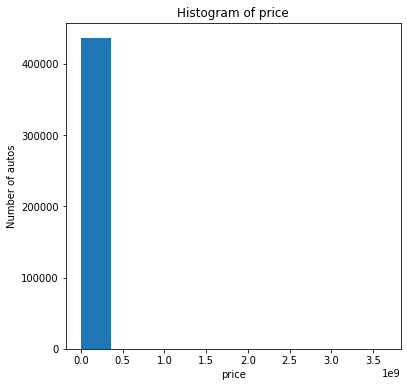

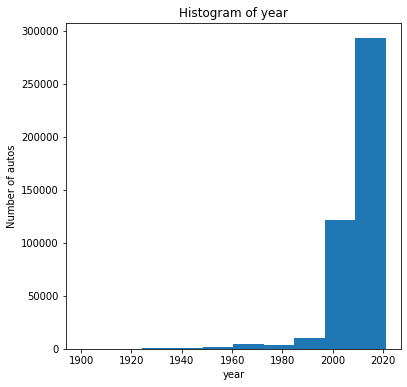

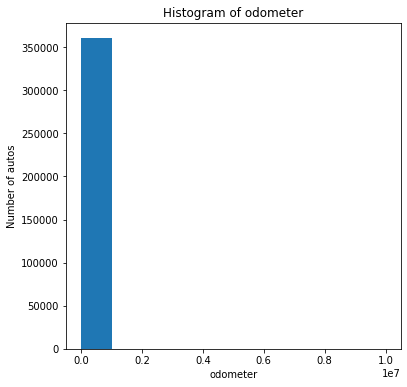

In [15]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['price', 'year', 'odometer']    
plot_histogram(auto_prices, num_cols)